In [4]:
from PIL import Image
import os
import sys
sys.path.append('../')
from matplotlib.pyplot import imshow
from utils import _all_images, mkdir

In [5]:
idx = 0
scale = 2
data_dir = '/media/data1/character/dataset/x4'
result_root = '/media/data1/character/dataset/x4/result'
hr_result_dir = os.path.join(result_root, 'crop_HR')
lr_result_dir = os.path.join(result_root, 'crop_LR')
#注意需要将LR上采样后放入HR数据文件夹，方便切换比较。LRup图像的命名方的例子：‘Canon_0098_x1_LRup.png’
#如果没有LR上采样的数据，直接将LR bicubic上采样即可
hr_dir = os.path.join(data_dir, 'image_HR')

mkdir(hr_result_dir)
mkdir(lr_result_dir)

im_paths = _all_images(hr_dir)
hr_paths = []
lrup_paths = []

for im_path in im_paths:
    if 'up' in im_path:
        lrup_paths.append(im_path)
    else:
        hr_paths.append(im_path)

print(len(hr_paths), len(lrup_paths))

52 52


# 根据XnView软件确定裁剪坐标x1 x2 y1 y2（画框可确定）

In [44]:
hr_path = hr_paths[idx]
lrup_path = lrup_paths[idx]

hr_name = os.path.basename(hr_path)[:-7]
lr_path= os.path.join(data_dir, 'image_LR', '%s_x1.png' % hr_name)

hr = Image.open(hr_path)
lrup = Image.open(lrup_path)
lr = Image.open(lr_path)
print(hr_name, hr.size, lrup.size, lr.size)

Sony_0341 (7952, 5304) (7952, 5304) (3976, 2652)


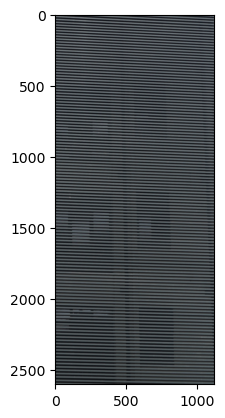

In [45]:
x1 = 3650
y1 = 2550
x2 = x1 + 1120
y2 = y1 + 2600
x1 = x1 - x1 % scale
y1 = y1 - y1 % scale
x2 = x2 - x2 % scale
y2 = y2 - y2 % scale

hr_c = hr.crop((x1, y1, x2, y2))
imshow(hr_c)

In [46]:
# 存储裁剪结果
hr_result_path = os.path.join(hr_result_dir, os.path.basename(hr_path))
hr_c.save(hr_result_path)
lrup_c = lrup.crop((x1, y1, x2, y2))
lrup_c.save(os.path.join(hr_result_dir, os.path.basename(lrup_path)))
lr_c = lr.crop((x1 // scale, y1 // scale, x2 // scale, y2 // scale))
lr_c.save(os.path.join(lr_result_dir, os.path.basename(lr_path)))
print(hr_c.size, lrup_c.size, lr_c.size)

(1120, 2600) (1120, 2600) (560, 1300)


# 观察裁剪后的LRup、HR，如果效果可以，进行下一张

In [41]:
# 下一张
idx += 1

In [43]:
#  上一张
idx -= 1

#### 